# Grouping with GSS

In [6]:
import pandas as pd
import numpy as np

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
sns.set_theme()
figsize(11, 5)

In [4]:
import sys
sys.path.append('lib')

Let's load the GSS dataset.

In [7]:
gss = pd.read_hdf('../data/gss.hdf5', 'gss')
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Lets have a utility function to return a series counts sorted by index

In [8]:
def counts(series: pd.Series) -> pd.Series:
    return series.value_counts(sort=False).sort_index()

The GSS interviews a few thousand respondents each year.

In [9]:
counts(gss.year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: year, dtype: int64

One of the [questions](https://gssdataexplorer.norc.org/projects/52787/variables/285/vshow) they ask is "Do you think the use of marijuana should be made legal or not?"

The answer codes are:

```
1	Legal
2	Not legal
8	Don't know
9	No answer
0	Not applicable
```

Here is the distribution of responses for all years.

In [10]:
counts(gss.grass)

0    24398
1    11027
2    25195
8     1733
9      113
Name: grass, dtype: int64

I'll replace "Don't know", "No answer", and "Not applicable" with NaN.

In [11]:
gss.grass.replace([0,8,9], np.nan, inplace=True)

And replace `2`, which represents "No", with `1`.  That way we can use `mean` to compute the fraction in favor.

In [12]:
gss.grass.replace(2, 0, inplace=True)

And set it to an integer type

In [16]:
gss = gss.astype({
    'grass': pd.Int8Dtype()
})

Here are the value counts after replacement.

In [17]:
counts(gss.grass)

0    25195
1    11027
Name: grass, dtype: Int64

And here's the mean.

In [18]:
gss.grass.mean()

0.3044282480260615

So 30% of respondents thought marijuana should be legal, at the time they were interviewed.

Now we can see how that fraction depends on age, cohort (year of birth), and period (year of interview).

### Group by year

First we'll group respondents by year.

In [20]:
grouped = gss.groupby('year')
grouped

The result in a `DataFrameGroupBy` object we can iterate through:

In [21]:
for name, group in grouped:
    print(name, len(group))

1972 1613
1973 1504
1974 1484
1975 1490
1976 1499
1977 1530
1978 1532
1980 1468
1982 1860
1983 1599
1984 1473
1985 1534
1986 1470
1987 1819
1988 1481
1989 1537
1990 1372
1991 1517
1993 1606
1994 2992
1996 2904
1998 2832
2000 2817
2002 2765
2004 2812
2006 4510
2008 2023
2010 2044
2012 1974
2014 2538
2016 2867


And we can compute summary statistics for each group.

In [31]:
# loop through a collection of dataframes
for name, group in grouped:
    print(name, np.round(group.grass.fillna(0).mean(), 2))

1972 0.0
1973 0.2
1974 0.0
1975 0.21
1976 0.29
1977 0.0
1978 0.29
1980 0.25
1982 0.0
1983 0.23
1984 0.21
1985 0.0
1986 0.17
1987 0.15
1988 0.1
1989 0.11
1990 0.1
1991 0.11
1993 0.16
1994 0.16
1996 0.19
1998 0.18
2000 0.22
2002 0.1
2004 0.1
2006 0.14
2008 0.25
2010 0.29
2012 0.3
2014 0.36
2016 0.38


Using a for loop can be useful for debugging, but it is more concise, more idiomatic, and faster to apply operations directly to the `DataFrameGroupBy` object.

For example, if you select a column from a `DataFrameGroupBy`, the result is a `SeriesGroupBy` that represents one `Series` for each group.

In [36]:
grouped.grass

You can loop through the `SeriesGroupBy`, but you normally don't.

In [37]:
# loop through a collection of series
for name, series in grouped.grass:
    print(name, np.round(series.fillna(0).mean(), 2))

1972 0.0
1973 0.2
1974 0.0
1975 0.21
1976 0.29
1977 0.0
1978 0.29
1980 0.25
1982 0.0
1983 0.23
1984 0.21
1985 0.0
1986 0.17
1987 0.15
1988 0.1
1989 0.11
1990 0.1
1991 0.11
1993 0.16
1994 0.16
1996 0.19
1998 0.18
2000 0.22
2002 0.1
2004 0.1
2006 0.14
2008 0.25
2010 0.29
2012 0.3
2014 0.36
2016 0.38


Instead, you can apply a function to the `SeriesGroupBy`; the result is a new `Series` that maps from group names to the results from the function; in this case, it's the fraction of support for each interview year.

In [53]:
series = grouped.grass.mean()
series

year
1972        <NA>
1973    0.201365
1974        <NA>
1975    0.225692
1976    0.293956
1977        <NA>
1978     0.30565
1980    0.258584
1982        <NA>
1983    0.239437
1984    0.214789
1985        <NA>
1986    0.174669
1987    0.155065
1988    0.170517
1989    0.174924
1990    0.159404
1991    0.177755
1993    0.243427
1994    0.247221
1996    0.287139
1998    0.296659
2000    0.339581
2002    0.340376
2004    0.357855
2006    0.343516
2008     0.40016
2010    0.477399
2012    0.483534
2014    0.579015
2016    0.591104
Name: grass, dtype: Float64

You could do it like this, but the result is the same, since `dropna` results in an empty series for some years. The solution is to use `fillna` on the returned series

In [52]:
grouped.grass.mean().fillna(0)

year
1972         0.0
1973    0.201365
1974         0.0
1975    0.225692
1976    0.293956
1977         0.0
1978     0.30565
1980    0.258584
1982         0.0
1983    0.239437
1984    0.214789
1985         0.0
1986    0.174669
1987    0.155065
1988    0.170517
1989    0.174924
1990    0.159404
1991    0.177755
1993    0.243427
1994    0.247221
1996    0.287139
1998    0.296659
2000    0.339581
2002    0.340376
2004    0.357855
2006    0.343516
2008     0.40016
2010    0.477399
2012    0.483534
2014    0.579015
2016    0.591104
Name: grass, dtype: Float64

Overall support for legalization has been increasing since 1990.

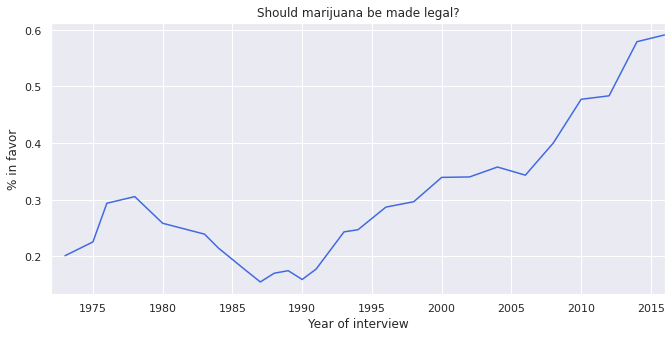

In [63]:
p = sns.lineplot(
    x = series.index,
    y = series.values,
    color = 'royalblue'
);
# p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right');
p.set(
    xlabel = 'Year of interview',
    ylabel = '% in favor',
    title = 'Should marijuana be made legal?',
    xlim = (series.index[0], series.index[-1])
);


### Group by cohort

The variable `cohort` contains respondents' year of birth.

In [70]:
counts(gss.cohort.astype(pd.UInt16Dtype()))

1883      2
1884      3
1885      2
1886      4
1887     10
       ... 
1994    116
1995     89
1996     50
1997     53
1998      6
Name: cohort, Length: 116, dtype: Int64

In [72]:
gss = gss.astype({
    'cohort': pd.UInt16Dtype()
})

In [75]:
counts(gss.cohort)

1883      2
1884      3
1885      2
1886      4
1887     10
       ... 
1994    116
1995     89
1996     50
1997     53
1998      6
Name: cohort, Length: 116, dtype: Int64

Pulling together the code from the previous section, we can plot support for legalization by year of birth.

In [80]:
gss.grass.dropna()

1613     0
1614     0
1615     1
1616     0
1617     1
        ..
62458    1
62459    1
62460    0
62462    1
62463    0
Name: grass, Length: 36222, dtype: Int8

In [87]:
grouped = gss.groupby('cohort')
series = grouped.grass.mean()
series

cohort
1883        <NA>
1884        <NA>
1885        <NA>
1886         0.0
1887         0.2
          ...   
1994    0.692308
1995    0.507937
1996    0.966667
1997    0.681818
1998    0.666667
Name: grass, Length: 116, dtype: Float64

In [85]:
series.index[-1]

1998

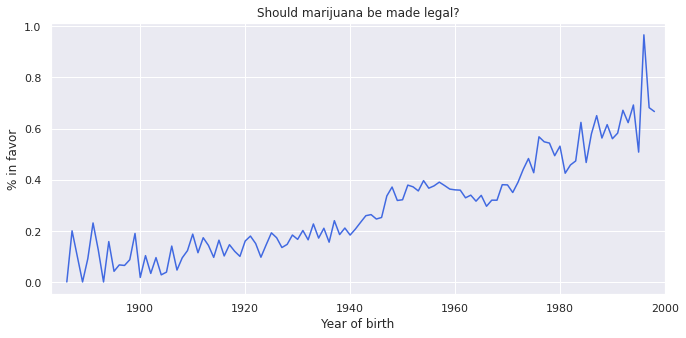

In [88]:
p = sns.lineplot(
    x = series.index,
    y = series.values,
    color = 'royalblue'
);
p.set(
    xlabel = 'Year of birth',
    ylabel = '% in favor',
    title = 'Should marijuana be made legal?',
    xlim = (series.index[0], 2000)
);

Later generations are more likely to support legalization than earlier generations.

### Group by age

Finally, let's see how support varies with age at time of interview.

In [90]:
grouped = gss.groupby('age')
series = grouped.grass.mean()

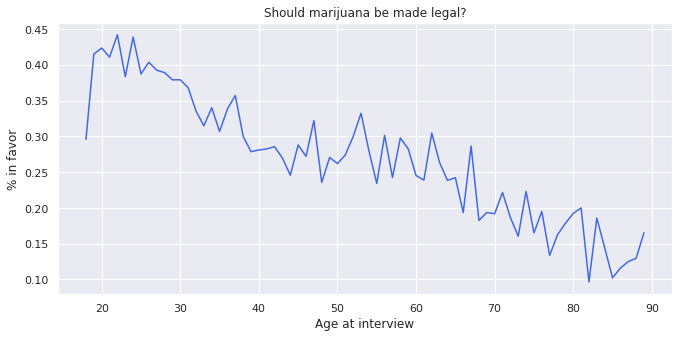

In [92]:
p = sns.lineplot(
    x = series.index,
    y = series.values,
    color = 'royalblue'
);
p.set(
    xlabel = 'Age at interview',
    ylabel = '% in favor',
    title = 'Should marijuana be made legal?'
);

Younger people are more likely to support legalization than old people.

In general, it is not easy to separate period, cohort, and age effects, but there are ways.  We'll come back to this example to see how.